In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import The Libraries

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

## Folder Paths

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(2870, 150, 150, 3)

## Training & Building & Complie The NN

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new, num_classes=4)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new, num_classes=4)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 69, 69, 64)        0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
73/73 [==============================] - 12s 52ms/step - loss: 2.1934 - accuracy: 0.3292 - val_loss: 1.1824 - val_accuracy: 0.5444
Epoch 2/50
73/73 [==============================] - 3s 40ms/step - loss: 0.9867 - accuracy: 0.5740 - val_loss: 0.9068 - val_accuracy: 0.5483
Epoch 3/50
73/73 [==============================] - 3s 40ms/step - loss: 0.8148 - accuracy: 0.6532 - val_loss: 0.6457 - val_accuracy: 0.7606
Epoch 4/50
73/73 [==============================] - 3s 40ms/step - loss: 0.7000 - accuracy: 0.6975 - val_loss: 0.6110 - val_accuracy: 0.7799
Epoch 5/50
73/73 [==============================] - 3s 40ms/step - loss: 0.5805 - accuracy: 0.7655 - val_loss: 0.5305 - val_accuracy: 0.7992
Epoch 6/50
73/73 [==============================] - 3s 40ms/step - loss: 0.4559 - accuracy: 0.8223 - val_loss: 0.5491 - val_accuracy: 0.8031
Epoch 7/50
73/73 [==============================] - 3s 40ms/step - loss: 0.3941 - accuracy: 0.8498 - val_loss: 0.6264 - val_accuracy: 0.7915
Epoch 8/50
7

In [12]:
y_pred=model.predict(X_test)

In [13]:
print(y_pred)
y_pred_indices = np.argmax(y_pred, axis=1)
print('=======================================================')
print(y_pred_indices)

[[3.0802055e-10 2.5246536e-06 9.9999571e-01 1.7689433e-06]
 [7.3985942e-04 3.1930336e-03 1.3785606e-04 9.9592930e-01]
 [6.5958694e-16 2.1433617e-10 1.0000000e+00 2.4719658e-12]
 ...
 [4.8510325e-09 7.1313724e-07 9.9999917e-01 1.7800042e-07]
 [7.7639765e-05 1.9663235e-03 3.1361105e-05 9.9792457e-01]
 [1.5150459e-04 5.7470258e-03 5.3108968e-05 9.9404836e-01]]
[2 3 2 3 1 0 3 3 3 0 1 0 0 1 3 2 3 3 1 0 3 1 0 1 1 2 1 0 3 1 0 1 0 1 2 3 0
 2 0 2 0 1 0 0 0 2 1 1 1 1 0 2 3 3 0 0 3 3 0 3 0 3 2 3 2 3 0 3 0 1 3 0 0 3
 0 3 2 3 1 0 0 1 1 3 2 0 1 0 0 2 0 3 3 0 3 2 2 3 0 1 0 2 0 2 3 1 3 3 0 2 1
 3 2 2 1 1 0 0 2 2 3 2 0 3 3 1 1 0 2 3 3 1 1 2 0 3 3 3 0 1 3 0 0 0 1 0 2 0
 1 0 3 0 1 0 1 1 1 2 1 2 1 3 0 0 1 0 3 3 3 3 3 1 0 3 3 2 0 2 3 1 0 3 0 0 0
 0 2 2 1 0 0 3 0 1 0 3 0 1 1 3 3 3 3 1 0 0 0 3 0 3 3 1 3 2 2 0 3 0 0 2 3 1
 0 3 0 0 0 1 0 3 3 0 3 1 0 0 2 1 2 1 3 0 1 2 3 1 3 0 0 0 0 1 3 0 0 3 2 0 0
 2 3 2 3 3 3 0 3 0 0 1 1 0 1 1 2 1 0 1 3 0 0 3 2 0 2 3 3]


In [14]:
y_test_indices = np.argmax(y_test, axis=1)

In [15]:
accuracy = accuracy_score(y_test_indices, y_pred_indices)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9268


## Result Visiulaization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

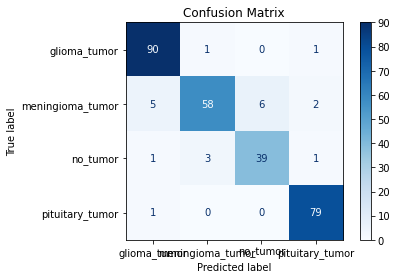

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_indices,y_pred_indices, labels=range(len(labels)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

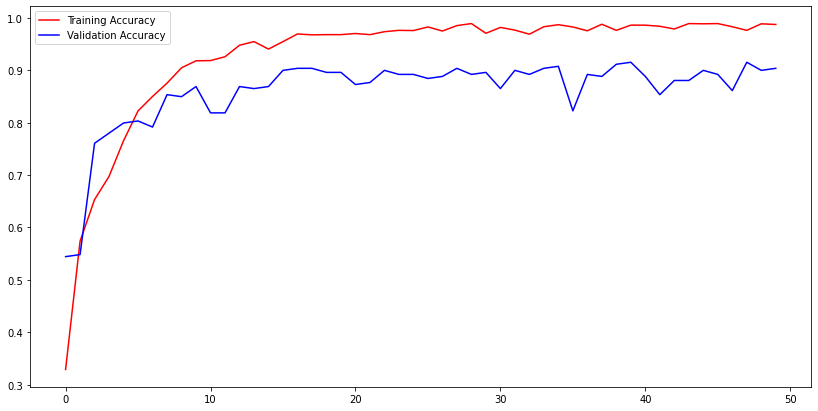

In [18]:
#model.save('braintumor.v1')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

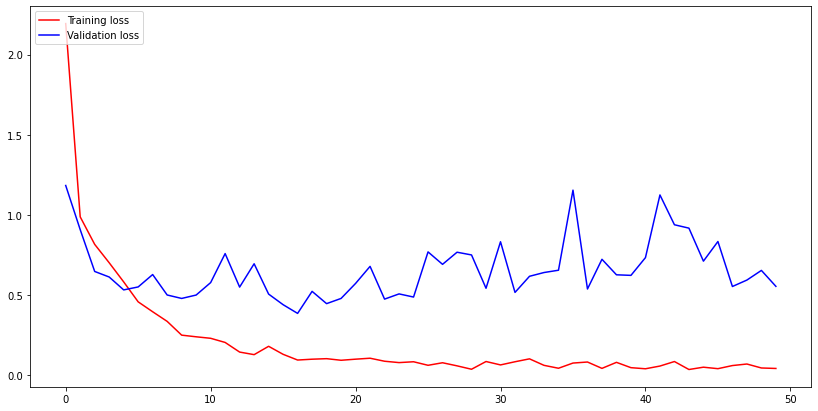

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

## Prediction

In [20]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(109).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [21]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

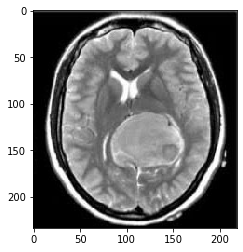

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(109).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

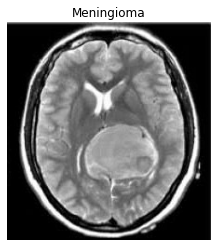

In [23]:
predictor = model.predict(img_array)
index = predictor.argmax()

# Map index to label
labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
tumor_type = labels[index]



# Display the image with the predicted label
plt.imshow(img)
plt.title(tumor_type)
plt.axis('off')
plt.show()